In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("/Users/shristidhakal/Documents/Data Science Projects/Classification Problems/Loan_Prediction/train.csv")
test = pd.read_csv("/Users/shristidhakal/Documents/Data Science Projects/Classification Problems/Loan_Prediction/test.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape, test.shape

((614, 13), (367, 12))

In [9]:
#count of each category in a variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#Set to normalize to print proportions instead of counts
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Univariate Analysis

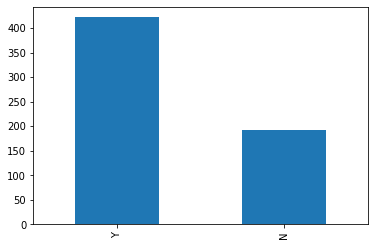

In [11]:
#plotting bar graph of the dependent variable
train['Loan_Status'].value_counts().plot.bar()

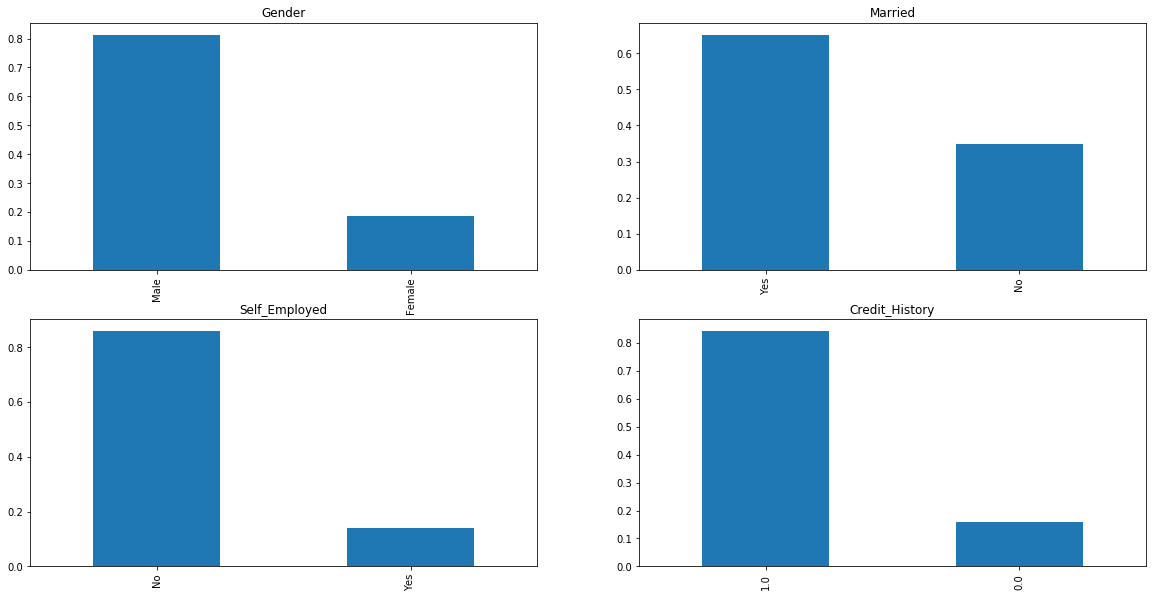

In [12]:
#plotting bar graphs of the independent variables that are categorical 
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Credit_History')

The bar plots show that:
<li>About 80% applicants in the dataset are male</li>
<li>About 60% applicants are married</li>
<li>About 15% applicants are self-employed, and</li>
<li>About 85% applicants have repaid their debt</li>
</ol>

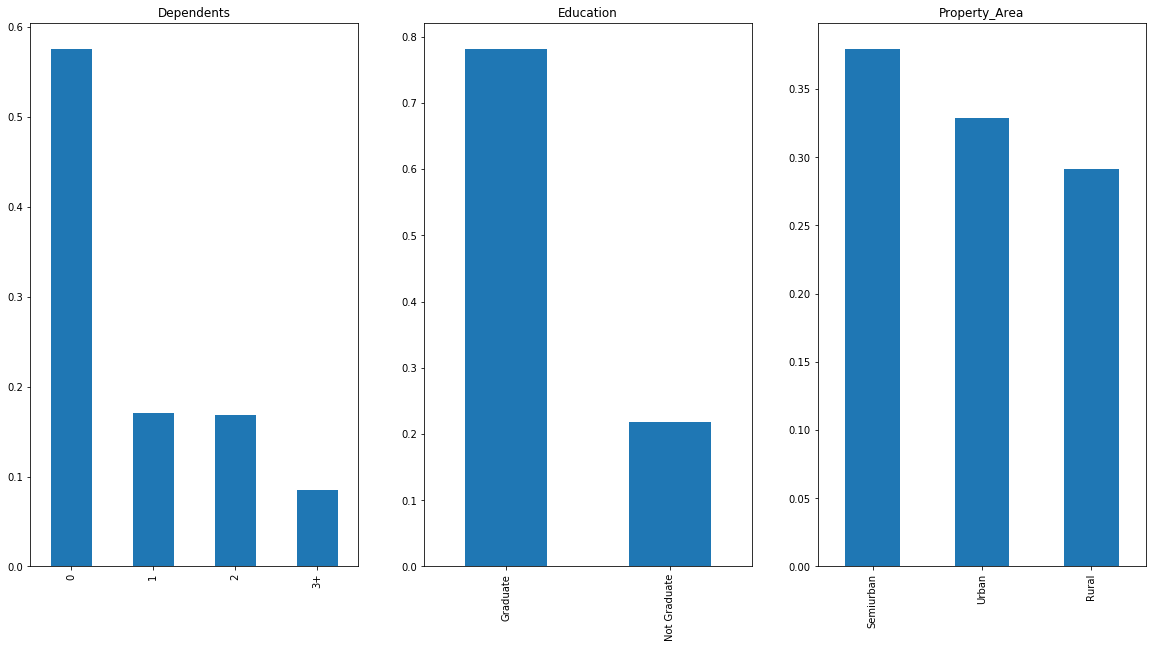

In [13]:
#plotting bar graphs of the independent variables that are ordinal 
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Property_Area')


These three bar plots above show that:
<li>Most applicants do not have dependents</li>
<li>About 80% applicants are Grdauate</li>
<li>Most of the applicants are from Semiurban area</li>
</ol>

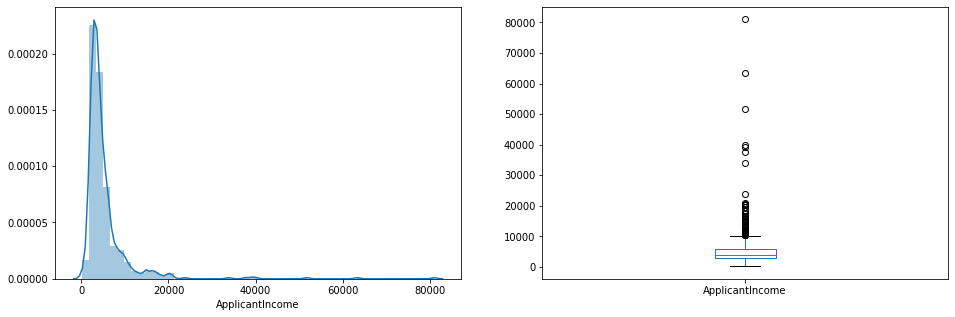

In [14]:
#plotting numerical independent variables
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

The histogram is not normally distributed (i.e. it is not bell-shaped) and has majority of income values towards the left (less than 200,000). The boxplot shows the same information with a lot of extreme values/outliers present in the dataset. This could simply be because income is affected by education levels and we have all the education levels displayed on the charts above. 
</ol>

Next, we'll separate the ApplicantIncome boxplot by Education.

Text(0.5, 0.98, '')

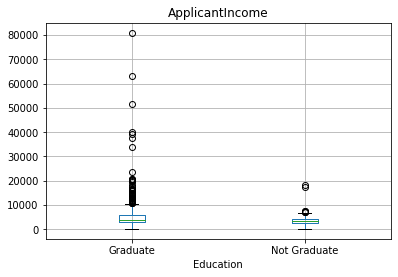

In [15]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

Here, you can see that most of the outliers (higher income amounts) in the dataset come from the Graduate category.

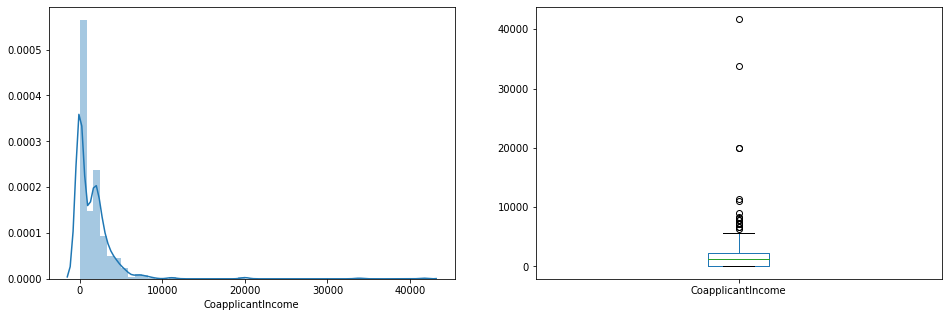

In [16]:
#visualizing coapplicant income 
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We see similar distribution of coapplicant income as that of applicant income i.e. most income values of coapplicants are centered towards the left with most values lying in the range 0-5000 and there are a lot of outliers present.

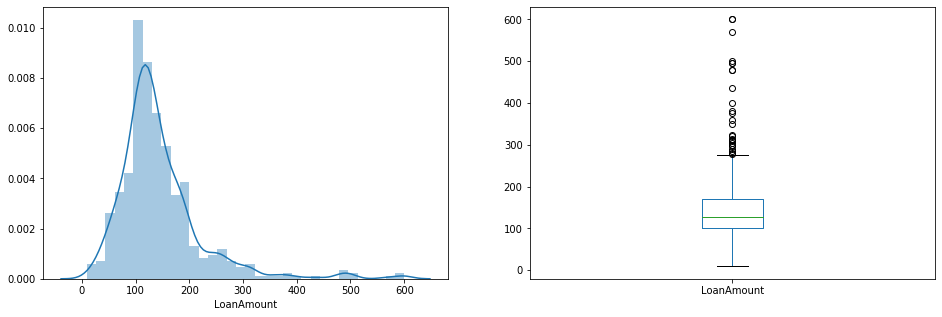

In [18]:
#visualizing loan amount 
plt.figure(1)
plt.subplot(121)
train=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

The distribution of LoanAmount is fairly normal, but there are a lot of outliers present. 

Next, let's check how well the features are correlated with the target variable 'Loan status'


### Bivariate Analysis

Some hypotheses for the analysis:
<li>Applicants with high income should have higher chances of loan approval.</li>
<li>Applicants who have repaid their previous debts have higher chances of loan approval.</li>
<li>Lower loan amounts increase the chance for loan approval.</li>
<li>Lesser amount of monthly loan payments increase the chance for loan approval.</li>
</ol>

Let's try to test these hypotheses using bivariate analysis.

#### Categorial Independent Variable vs Target Variable

Creating a stacked bar plot to see the proportion of approved and unapproved loans.

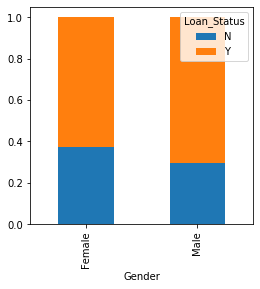

In [26]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Looking at the stacked bar charts, we can say that the proportion of approved and unapproved loans is more or less the same for both females and males.